https://openfree.energy/ 

https://docs.openfree.energy/en/latest/tutorials/rbfe_cli_tutorial.html


In [ ]:
! pwd


/home/jgc/Documents/github/molecular_glues/BTK/fep


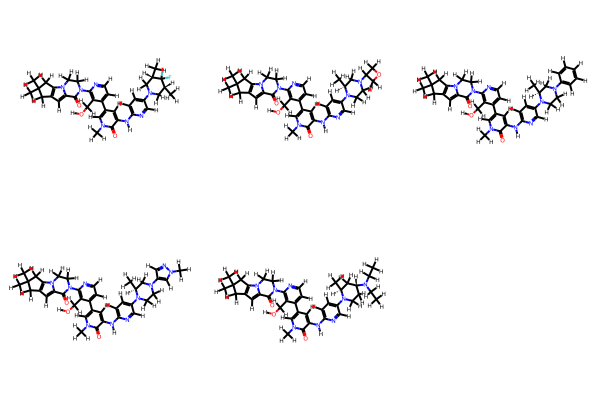

In [4]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

# Extract the contents of the sdf file and visualise it
ligands_rdmol = [mol for mol in
                 Chem.SDMolSupplier('prep/ligands.sdf', removeHs=False)]

for ligand in ligands_rdmol:
    AllChem.Compute2DCoords(ligand)

Chem.Draw.MolsToGridImage(ligands_rdmol)

Creating openFE Small molecule component

load ligands using RDKiT

In [5]:
import locale
#locale.getpreferredencoding = lambda _: 'UTF-8'  # hack for google colab, not needed for local execution
from openfe import SmallMoleculeComponent

# Load ligands using RDKit
ligands_sdf = Chem.SDMolSupplier('prep/ligands.sdf', removeHs=False)

# Now pass these to form a list of Molecules
ligand_mols = [SmallMoleculeComponent(sdf) for sdf in ligands_sdf]#

Load ligands using OpenFF toolkit

In [6]:
from openff.toolkit import Molecule
from openfe import SmallMoleculeComponent

# Load ligands using OpenFF toolkit
ligands_sdf = Molecule.from_file('prep/ligands.sdf')

# Now pass these to form a list of Molecules
ligand_mols = [SmallMoleculeComponent.from_openff(sdf) for sdf in ligands_sdf]

In [7]:
print("name: ", ligand_mols[0].name)

name:  btk_fenebrutinib_analogs.sdf_i0-again4_out1


In [8]:
type(ligand_mols[0].to_openff())

openff.toolkit.topology.molecule.Molecule

Ligand Atom Mapping

Unique atoms between each mapping are shown in red, and atoms which are mapped but undergo element changes are shown in blue. Bonds which either involve atoms that are unique or undergo element changes are highlighted in red.

In [15]:
from openfe.setup import LomapAtomMapper
mapper = LomapAtomMapper()

lomap_mapping = next(mapper.suggest_mappings(ligand_mols[1], ligand_mols[2]))

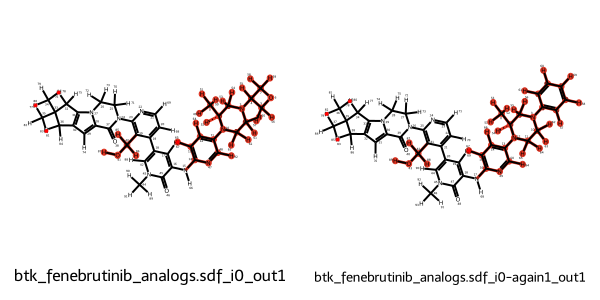

In [16]:
# We can display the atom mapping in 2D by calling it
lomap_mapping

In [17]:
# Visualize the mapping in 3D
from openfe.utils import visualization_3D

visualization_3D.view_mapping_3d(lomap_mapping, show_atomIDs=True)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Map ligands using KartograftAtomMapper

In [18]:
from kartograf import KartografAtomMapper
# Build Kartograf Atom Mapper
mapper = KartografAtomMapper(atom_map_hydrogens=True)

# Get Mapping
kartograf_mapping = next(mapper.suggest_mappings(ligand_mols[1], ligand_mols[2]))

INFO:	#################################
INFO:	Map Heavy Atoms 
INFO:	#################################
INFO:	Masking Atoms
INFO:	Build Distance Matrix
INFO:	Calculate Mapping
INFO:	Find Maximal overlapping connected sets of mapped atoms
INFO:	#################################
INFO:	Map Hydrogen Atoms: 
INFO:	#################################
INFO:	Masking Atoms
INFO:	Build Distance Matrix
INFO:	Calculate Mapping
INFO:	Find Maximal overlapping connected sets of mapped atoms


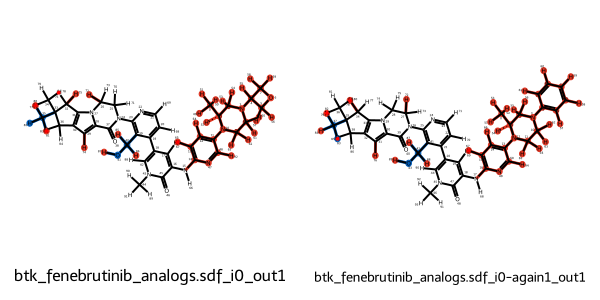

In [19]:
# We can display the atom mapping in 2D by calling it
kartograf_mapping

Ligand Network

In [20]:
# Create network from the two molecules
import openfe
from openfe.setup.ligand_network_planning import generate_radial_network
from openfe.setup.ligand_network_planning import generate_minimal_spanning_network
from openfe.setup.ligand_network_planning import generate_lomap_network
from openfe.setup import LomapAtomMapper

# Create an MST network
mst_network = generate_minimal_spanning_network(
    ligands=ligand_mols,
    scorer=openfe.lomap_scorers.default_lomap_score,
    mappers=[LomapAtomMapper(),])

# Create a LOMAP network
lomap_network = generate_lomap_network(
    molecules=ligand_mols,
    scorer=openfe.lomap_scorers.default_lomap_score,
    mappers=[LomapAtomMapper(),])

# Create a radial, choosing the first ligand as central ligand
radial_network = generate_radial_network(
    ligands=ligand_mols[1:],
    central_ligand=ligand_mols[0],
    mappers=[LomapAtomMapper(),])

 10%|#         | 1/10 [00:32<04:50, 32.33s/it]

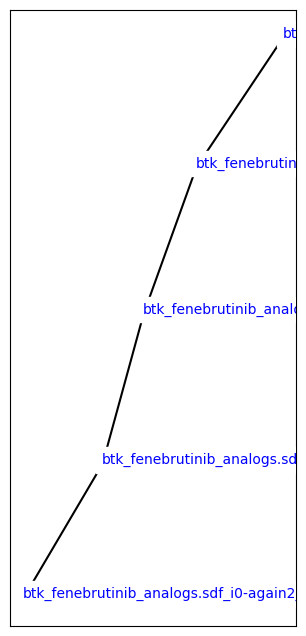

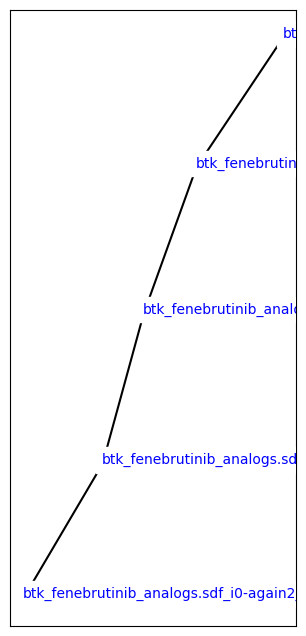

In [21]:
# Visualize the MST network
from openfe.utils.atommapping_network_plotting import plot_atommapping_network

plot_atommapping_network(mst_network)

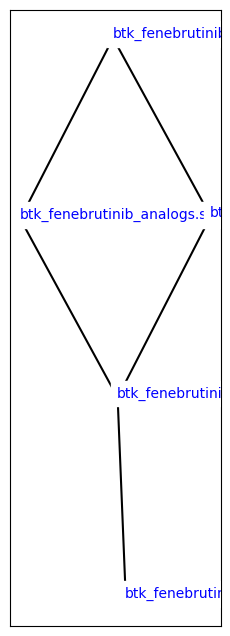

In [22]:
# Visualize the LOMAP network
from openfe.utils.atommapping_network_plotting import plot_atommapping_network

plot_atommapping_network(lomap_network)

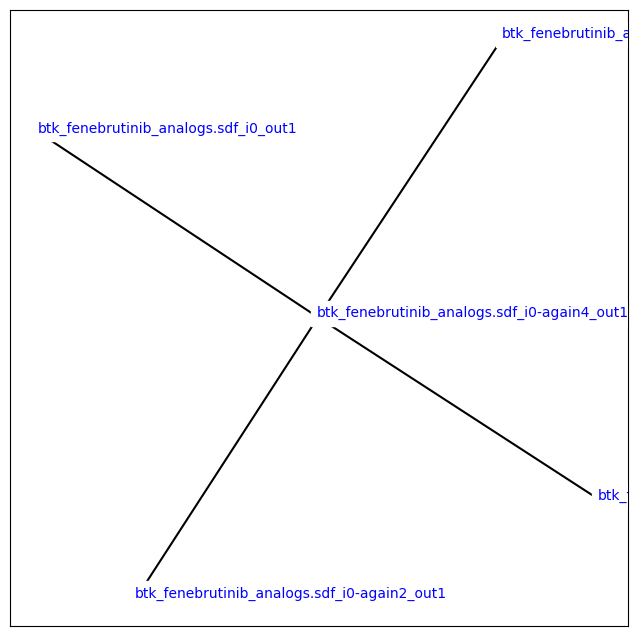

In [23]:
# Visualize the radial network
from openfe.utils.atommapping_network_plotting import plot_atommapping_network

plot_atommapping_network(radial_network)

In [24]:
mst_edges = [edge for edge in mst_network.edges]

# Pick an edge
edge = mst_edges[1]

# Print the smiles of the molecules and the mapping
print("molecule A smiles: ", edge.componentA.smiles)
print("molecule B smiles: ", edge.componentB.smiles)
print("map between molecule A and B: ", edge.componentA_to_componentB)

molecule A smiles:  C[C@H]1CN(C2COC2)CCN1c1ccc(Nc2cc(-c3ccnc(N4CCn5c(cc6c5CC(C)(C)C6)C4=O)c3CO)cn(C)c2=O)nc1
molecule B smiles:  C[C@H]1CN(c2ccccc2)CCN1c1ccc(Nc2cc(-c3ccnc(N4CCn5c(cc6c5CC(C)(C)C6)C4=O)c3CO)cn(C)c2=O)nc1
map between molecule A and B:  {15: 17, 16: 18, 17: 19, 18: 20, 19: 21, 20: 22, 21: 23, 22: 24, 23: 25, 24: 26, 25: 27, 26: 28, 27: 29, 28: 30, 29: 31, 30: 32, 31: 33, 32: 34, 33: 35, 34: 36, 35: 37, 36: 38, 37: 39, 38: 40, 39: 41, 42: 44, 43: 45, 44: 46, 45: 47, 46: 48, 66: 68, 67: 69, 68: 70, 69: 71, 70: 73, 71: 72, 72: 75, 73: 74, 74: 76, 75: 78, 76: 77, 77: 79, 78: 80, 79: 81, 80: 82, 81: 84, 82: 83, 83: 85, 84: 86, 88: 90, 89: 91, 90: 92, 91: 93}


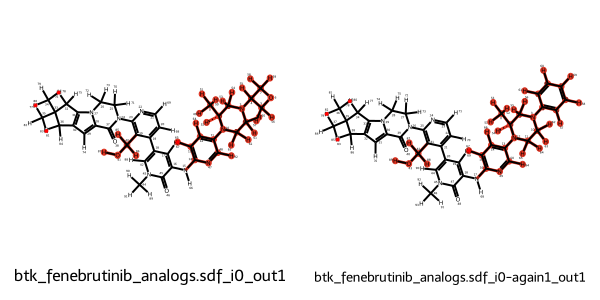

In [25]:
# We can display the atom mapping of an edge by calling it
edge

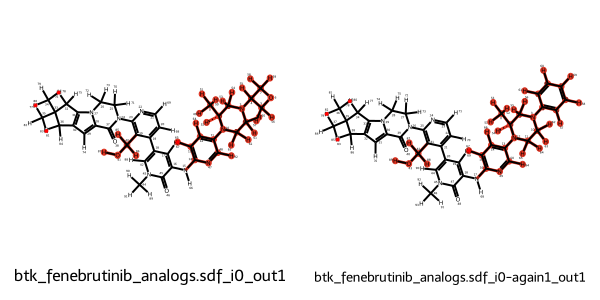

In [26]:
from IPython.display import Image

# mappings can also be saved to file if required
edge.draw_to_file('btk_edge.png')

# load it back for visualisation
Image("btk_edge.png")

Scoring the ligand network

In [27]:
# Convert to graphml
with open("prep/network_store.graphml", "w") as writer:
    writer.write(mst_network.to_graphml())

In [28]:
# First let's define the Protein and Solvent Components which we will be using
from openfe import SolventComponent, ProteinComponent
from openff.units import unit

protein = ProteinComponent.from_pdb_file('prep/prepared_5vfi.pdb')

# Note: the distance from the solute to add water is not defined here but in the
# the relevant RBFE solver method
solvent = SolventComponent(positive_ion='Na', negative_ion='Cl',
                           neutralize=True, ion_concentration=0.15*unit.molar)

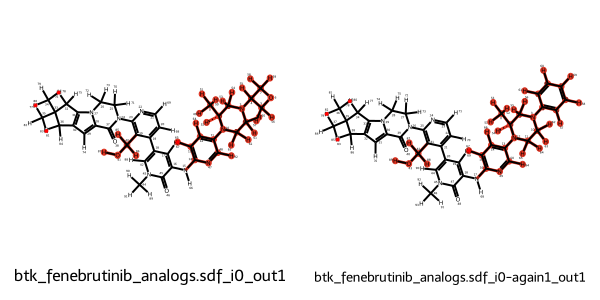

In [ ]:
# Extract the relevant edge for the 1 -> 2 transform in the radial graph
ejm_1_to_ejm_2 = [edge for edge in mst_network.edges if edge.componentB.name == "btk_fenebrutinib_analogs.sdf_i0-again1_out1"][0]

ejm_1_to_ejm_2

In [31]:
# Let's create the four ChemicalSystems
from openfe import ChemicalSystem

ejm_1_complex = ChemicalSystem({'ligand': ejm_1_to_ejm_2.componentA,
                                  'solvent': solvent,
                                  'protein': protein,},
                               name=ejm_1_to_ejm_2.componentA.name)
ejm_1_solvent = ChemicalSystem({'ligand': ejm_1_to_ejm_2.componentA,
                                  'solvent': solvent,},
                               name=ejm_1_to_ejm_2.componentA.name)

ejm_2_complex = ChemicalSystem({'ligand': ejm_1_to_ejm_2.componentB,
                                 'solvent': solvent,
                                 'protein': protein,},
                               name=ejm_1_to_ejm_2.componentB.name)
ejm_2_solvent = ChemicalSystem({'ligand': ejm_1_to_ejm_2.componentB,
                                 'solvent': solvent,},
                               name=ejm_1_to_ejm_2.componentB.name)

Defining the RBFE simulation settings and protocol

In [32]:
from openfe.protocols.openmm_rfe import RelativeHybridTopologyProtocol
from openff.units import unit

# Create the default settings
rbfe_settings = RelativeHybridTopologyProtocol.default_settings()

rbfe_settings.simulation_settings.equilibration_length = 10 * unit.picosecond # Reduce equilibration length to 10 picoseconds
rbfe_settings.simulation_settings.production_length = 50 * unit.picosecond # Reduce prodution length to 50 picoseconds

rbfe_settings.simulation_settings

{'early_termination_target_error': <Quantity(0.0, 'kilocalorie_per_mole')>,
 'equilibration_length': <Quantity(0.01, 'nanosecond')>,
 'minimization_steps': 5000,
 'n_replicas': 11,
 'production_length': <Quantity(0.05, 'nanosecond')>,
 'real_time_analysis_interval': <Quantity(250.0, 'picosecond')>,
 'real_time_analysis_minimum_time': <Quantity(500.0, 'picosecond')>,
 'sampler_method': 'repex',
 'sams_flatness_criteria': 'logZ-flatness',
 'sams_gamma0': 1.0,
 'time_per_iteration': <Quantity(1.0, 'picosecond')>}


In [33]:
# Create RBFE Protocol class
rbfe_protocol = RelativeHybridTopologyProtocol(
    settings=rbfe_settings
)

In [34]:
transformation_complex = openfe.Transformation(
            stateA=ejm_1_complex,
            stateB=ejm_2_complex,
            mapping=ejm_1_to_ejm_2,
            protocol=rbfe_protocol,  # use protocol created above
            name=f"{ejm_1_complex.name}_{ejm_2_complex.name}_complex"
        )
transformation_solvent = openfe.Transformation(
            stateA=ejm_1_solvent,
            stateB=ejm_2_solvent,
            mapping=ejm_1_to_ejm_2,
            protocol=rbfe_protocol,  # use protocol created above
            name=f"{ejm_1_solvent.name}_{ejm_2_solvent.name}_solvent"
        )

Create protocol DAG

In [35]:
complex_dag = transformation_complex.create()

solvent_dag = transformation_solvent.create()

Simulating RelativeLigandTransforms 

In [36]:
# complex dry-run
complex_unit = list(complex_dag.protocol_units)[0]

complex_unit.run(dry=True, verbose=True)

INFO:	Preparing the hybrid topology simulation
INFO:	Parameterizing molecules
INFO:	Requested to generate parameters for residue <Residue 0 (UNK) of chain 0>
INFO:	Generating a residue template for [H][O][C]([H])([H])[c]1[c]([N]2[C](=[O])[C]3=[C]([H])[C]4=[C]([N]3[C]([H])([H])[C]2([H])[H])[C]([H])([H])[C]([C]([H])([H])[H])([C]([H])([H])[H])[C]4([H])[H])[n][c]([H])[c]([H])[c]1[C]1=[C]([H])[N]([C]([H])([H])[H])[C](=[O])[C]([N]([H])[c]2[n][c]([H])[c]([N]3[C]([H])([H])[C]([H])([H])[N]([C]4([H])[C]([H])([H])[O][C]4([H])[H])[C]([H])([H])[C@]3([H])[C]([H])([H])[H])[c]([H])[c]2[H])=[C]1[H] using openff-2.1.1
INFO:	Preset charges applied to atom index 0
INFO:	Preset charges applied to atom index 1
INFO:	Preset charges applied to atom index 2
INFO:	Preset charges applied to atom index 3
INFO:	Preset charges applied to atom index 4
INFO:	Preset charges applied to atom index 5
INFO:	Preset charges applied to atom index 6
INFO:	Preset charges applied to atom index 7
INFO:	Preset charges applied to 

Please cite the following:

        Friedrichs MS, Eastman P, Vaidyanathan V, Houston M, LeGrand S, Beberg AL, Ensign DL, Bruns CM, and Pande VS. Accelerating molecular dynamic simulations on graphics processing unit. J. Comput. Chem. 30:864, 2009. DOI: 10.1002/jcc.21209
        Eastman P and Pande VS. OpenMM: A hardware-independent framework for molecular simulations. Comput. Sci. Eng. 12:34, 2010. DOI: 10.1109/MCSE.2010.27
        Eastman P and Pande VS. Efficient nonbonded interactions for molecular dynamics on a graphics processing unit. J. Comput. Chem. 31:1268, 2010. DOI: 10.1002/jcc.21413
        Eastman P and Pande VS. Constant constraint matrix approximation: A robust, parallelizable constraint method for molecular simulations. J. Chem. Theor. Comput. 6:434, 2010. DOI: 10.1021/ct900463w
        Chodera JD and Shirts MR. Replica exchange and expanded ensemble simulations as Gibbs multistate: Simple improvements for enhanced mixing. J. Chem. Phys., 135:194110, 2011. DOI:10.1063/

{'debug': {'sampler': <instance of HybridRepexSampler>}}

Even when using the Python API to set up the RBFE calculations, you can dump all Transformations to a JSON file and run the calculations using the openfe quickrun command. Here, we will show you how to save the Transformations to the JSON file.

In [37]:
import pathlib
# first we create the directory
transformation_dir = pathlib.Path("prep/btk_json")
transformation_dir.mkdir(exist_ok=True)

# then we write out the transformations
transformation_complex.dump(transformation_dir / f"{transformation_complex.name}.json")
transformation_solvent.dump(transformation_dir / f"{transformation_solvent.name}.json")

Run  relative free energy simulations using openfe

In [38]:
! openfe quickrun prep/btk_json/btk_fenebrutinib_analogs.sdf_i0_out1_btk_fenebrutinib_analogs.sdf_i0-again1_out1_complex.json -o results_complex.json -d run/btk_complex

Loading file...
Planning simulations for this edge...
Starting the simulations for this edge...
SYSTEM CONFIG DETAILS:
INFO:openfe.utils.system_probe.log:SYSTEM CONFIG DETAILS:
hostname: 'jgc'
INFO:openfe.utils.system_probe.log.hostname:hostname: 'jgc'
CUDA-based GPU not found
INFO:openfe.utils.system_probe.log.gpu:CUDA-based GPU not found
Memory used: 8.6G (69.2%)
INFO:openfe.utils.system_probe.log:Memory used: 8.6G (69.2%)
run/btk_complex/scratch_RelativeHybridTopologyProtocolUnit-d64f5cd952484c10b9cdc8cd9a041885_attempt_0: 14% full (748.8G free)
INFO:openfe.utils.system_probe.log:run/btk_complex/scratch_RelativeHybridTopologyProtocolUnit-d64f5cd952484c10b9cdc8cd9a041885_attempt_0: 14% full (748.8G free)
Preparing the hybrid topology simulation
INFO:gufekey.openfe.protocols.openmm_rfe.equil_rfe_methods.RelativeHybridTopologyProtocolUnit:Preparing the hybrid topology simulation
Parameterizing molecules
INFO:gufekey.openfe.protocols.openmm_rfe.equil_rfe_methods.RelativeHybridTopologyPr

In [ ]:
# ! openfe quickrun prep/btk_json/btk_fenebrutinib_analogs.sdf_i0_out1_btk_fenebrutinib_analogs.sdf_i0-again1_out1_solvent.json -o results_complex.json -d run/btk_solvent

Analysis

5.1. Setup

The setup, as described above, can also be carried out using the CLI command openfe plan-rbfe-network.

openfe plan-rbfe-network -M prep/ligands.sdf -p prep/.pdb -o prep/btk_json/

This command plans a relative binding free energy network and saves it as JSON files for the openfe quickrun command.

By default, this tool makes the following choices:

    Atom mappings performed by LOMAP, with settings max3d=1.0 and element_change=False
    Minimal spanning network as the network planner, with LOMAP default score as the weight function
    Water as solvent, with NaCl counter ions at 0.15 M concentration.
    Protocol is the OpenMM-based relative hybrid topology protocol, with default settings.

These choices can be customized by creating a settings yaml file, which is passed in via the -s settings.yaml option. For more details, please visit our user guide section about Customising CLI planning with yaml settings